<a href="https://colab.research.google.com/github/arielhernandez28/columna_vertebral/blob/main/columna_vertebral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimados!

Este taller colaborativo tiene un enfoque práctico y evaluativo. Aquí, el reto está en tus manos: tú serás el encargado de implementar el proyecto completo. El objetivo es que pongas en práctica las técnicas de preprocesamiento de datos, ingeniería de características, evaluación, ajustes de hiperparámetros y entrenamiento de modelos predictivos supervisados, debes trabajar con tres algoritmos y te propongo los más importantes que exploramos en el curso: KNN, SVC y XGBoost. Sigue los pasos a continuación:

1. Conformar un equipo de trabajo de máximo dos estudiantes.
2. Revisar los recursos de aprendizaje de la unidad.
3. Preprocesar el dataset Download dataset de manera efectiva y analítica:
  -Carga el dataset proporcionado.
  -Realiza una inspección inicial de los datos para identificar valores      -faltantes, columnas relevantes y posibles inconsistencias.
   Preprocesa los datos: limpia valores nulos, convierte las variables categóricas a numéricas (si es necesario), y asegúrate de que las variables estén listas para ser alimentadas a los modelos.
4. Realizar ingeniería de características que pueda mejorar el desempeño de     los  modelos:
A partir de las variables originales, crea nuevas características que puedan mejorar el desempeño de los modelos. Por ejemplo, puedes crear ratios, transformaciones de variables o combinaciones de columnas que agreguen valor.
Realiza una selección de características: elimina columnas irrelevantes o altamente correlacionadas, y selecciona las características más importantes para el modelo. Realizar escalamiento de las variables, si es necesario numerice. Plantee usar gestión de flujos de trabajo de machine learning con pipelines de Scikit-Learn.
5. Entrenar los modelos de clasificación (KNN, SVC, XGBoost) y optimizarlos mediante técnicas de tuning de hiperparámetros:
Entrena tres modelos de clasificación supervisada: KNN, SVC y XGBoost.
Ajusta los parámetros de cada modelo para obtener su mejor desempeño. Recuerda que cada modelo tiene diferentes hiperparámetros que se pueden ajustar, como el número de vecinos en KNN, el kernel en SVC, el learning rate y la profundidad en XGBoost. Si es preciso use validación cruzada y k-fold cross-validation.
6. Realizar el ajuste de hiperparámetros usando técnicas como GridSearchCV o RandomizedSearchCV para optimizar cada modelo. Ajuste los parámetros clave de cada algoritmo para encontrar la combinación que mejore el desempeño.
7. Evaluar los modelos utilizando métricas de rendimiento como accuracy, precision, recall y F1-score:
Evalúa el rendimiento de cada modelo utilizando las métricas adecuadas, como accuracy, precision, recall, F1-score, y matrices de confusión.
Compara el desempeño de los tres modelos utilizando estas métricas. Recuerda que un modelo puede ser más preciso pero menos sensible, y otro puede ser más equilibrado.
8. Seleccionar el mejor modelo basado en los resultados obtenidos:
Selecciona el modelo con el mejor rendimiento basado en las métricas de evaluación.
Justifica tu elección: ¿Por qué crees que este modelo es el más adecuado para este conjunto de datos?
9. Finalmente, envía por correo el enlace de google colab con los permisos de edición con la solución del taller  para que el profesor revise tu actividad. De manera adicional, subes el archivo *.ipynb con la solución al correo.


In [1]:
import pandas as pd

# Cargar los datos desde la URL
url = 'https://github.com/arielhernandez28/columna_vertebral/raw/main/columna_vertebral.xlsx'
df = pd.read_excel(url)

# Mostrar las primeras filas y la información general del DataFrame
display(df.head())
display(df.info())

,índice,incidencia_pélvica,inclinación_pélvica,ángulo_lordosis_lumbar,pendiente_sacra,radio_pélvico,grado_espondilolistesis,clase
0,0,630278175,2.255259e+09,3.960912e+09,4.047523e+09,9867291675,-2.544000e-01,1
1,1,3905695098,1.006099e+09,2.501538e+09,2.899596e+09,1144054254,4.564259e+09,1
2,2,6883202098,2.221848e+09,5.009219e+09,4.661354e+09,1059851355,-3.530317e+09,1
3,3,6929700807,2.465288e+09,4.431124e+09,4.464413e+09,1018684951,1.121152e+09,1
4,4,4971285934,9.652075e+09,2.831741e+07,4.006078e+09,1081687249,7.918501e+09,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   índice                    310 non-null    int64  
 1    incidencia_pélvica       310 non-null    int64  
 2    inclinación_pélvica      310 non-null    float64
 3    ángulo_lordosis_lumbar   310 non-null    float64
 4    pendiente_sacra          310 non-null    float64
 5    radio_pélvico            310 non-null    int64  
 6    grado_espondilolistesis  310 non-null    float64
 7    clase                    310 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 19.5 KB


None

In [2]:
# Inspección inicial: verificar valores faltantes
print("Valores faltantes por columna:")
display(df.isnull().sum())

# En este caso, df.info() ya mostró que no hay valores nulos.
# Si hubiera, podríamos usar métodos como df.dropna() o df.fillna()

# Verificar tipos de datos para identificar variables categóricas (si las hay)
print("\nTipos de datos por columna:")
display(df.dtypes)

# Si hubiera columnas categóricas que no fueran numéricas, se podrían convertir
# usando técnicas como One-Hot Encoding (por ejemplo, con pd.get_dummies)
# o Label Encoding (por ejemplo, con sklearn.preprocessing.LabelEncoder).
# En este dataset, todas las columnas son numéricas (int64 o float64) o la columna 'clase' que es int64
# y parece ser la variable objetivo.

# Mostrar estadísticas descriptivas para identificar posibles inconsistencias
print("\nEstadísticas descriptivas:")
display(df.describe())

# Eliminar la columna 'índice' si no es relevante para el modelado
if 'índice' in df.columns:
    df = df.drop('índice', axis=1)
    print("\nColumna 'índice' eliminada.")

# Mostrar las primeras filas después del preprocesamiento (si hubo cambios)
display(df.head())

Valores faltantes por columna:


,0
índice,0
incidencia_pélvica,0
inclinación_pélvica,0
ángulo_lordosis_lumbar,0
pendiente_sacra,0
radio_pélvico,0
grado_espondilolistesis,0
clase,0



Tipos de datos por columna:


,0
índice,int64
incidencia_pélvica,int64
inclinación_pélvica,float64
ángulo_lordosis_lumbar,float64
pendiente_sacra,float64
radio_pélvico,int64
grado_espondilolistesis,float64
clase,int64



Estadísticas descriptivas:


,índice,incidencia_pélvica,inclinación_pélvica,ángulo_lordosis_lumbar,pendiente_sacra,radio_pélvico,grado_espondilolistesis,clase
count,310.000000,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,310.000000
mean,154.500000,5.390227e+09,2.622408e+09,4.589988e+09,3.824370e+09,1.731031e+09,2.482636e+09,0.677419
std,89.633513,2.281342e+09,2.547971e+09,2.425288e+09,1.743779e+09,2.280837e+09,3.427805e+09,0.468220
min,0.000000,4.452905e+07,-6.554948e+09,1.400000e+01,4.500000e+01,1.121516e+06,-9.569250e+09,0.000000
25%,77.250000,4.296802e+09,1.346115e+09,3.331128e+09,3.012394e+09,1.106482e+09,1.204748e+08,0.000000
50%,154.500000,5.500081e+09,1.925914e+09,4.783288e+09,3.980557e+09,1.189070e+09,2.684927e+09,1.000000
75%,231.750000,7.046291e+09,3.043320e+09,6.209325e+09,5.108888e+09,1.280502e+09,5.207533e+09,1.000000
max,309.000000,9.665732e+09,9.976664e+09,9.628306e+09,7.969515e+09,9.971245e+09,9.356374e+09,1.000000



Columna 'índice' eliminada.


,incidencia_pélvica,inclinación_pélvica,ángulo_lordosis_lumbar,pendiente_sacra,radio_pélvico,grado_espondilolistesis,clase
0,630278175,2.255259e+09,3.960912e+09,4.047523e+09,9867291675,-2.544000e-01,1
1,3905695098,1.006099e+09,2.501538e+09,2.899596e+09,1144054254,4.564259e+09,1
2,6883202098,2.221848e+09,5.009219e+09,4.661354e+09,1059851355,-3.530317e+09,1
3,6929700807,2.465288e+09,4.431124e+09,4.464413e+09,1018684951,1.121152e+09,1
4,4971285934,9.652075e+09,2.831741e+07,4.006078e+09,1081687249,7.918501e+09,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Separar características (X) y la variable objetivo (y)
# Corregir el nombre de la columna 'clase' para incluir espacios
X = df.drop(' clase', axis=1)
y = df[' clase']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ingeniería de Características (ejemplos - se podrían explorar más)
# Crear un ratio simple: incidencia_pélvica / inclinación_pélvica (evitar división por cero si es posible)
# Aquí asumimos que no hay ceros o se manejan adecuadamente si los hay
X_train['ratio_inc_incl'] = X_train[' incidencia_pélvica'] / (X_train[' inclinación_pélvica'] + 1e-9) # Añadir epsilon para evitar div por 0
X_test['ratio_inc_incl'] = X_test[' incidencia_pélvica'] / (X_test[' inclinación_pélvica'] + 1e-9)

# Transformación logarítmica para variables con distribuciones sesgadas (ejemplo con radio_pélvico)
# Verificar si hay valores <= 0 antes de aplicar log
if (X_train[' radio_pélvico'] > 0).all():
    X_train['log_radio_pélvico'] = np.log(X_train[' radio_pélvico'])
    X_test['log_radio_pélvico'] = np.log(X_test[' radio_pélvico'])
else:
    print("Advertencia: ' radio_pélvico' contiene valores no positivos, no se aplicará transformación logarítmica.")


# Selección de características (ejemplo - se podría usar métodos más avanzados)
# Mantener todas las características por ahora, se puede refinar más adelante si es necesario.
# Por ejemplo, se podría usar SelectKBest, RFE, o analizar la correlación.

# Escalamiento de variables
# Usaremos StandardScaler dentro de un pipeline
scaler = StandardScaler()

# Configuración de pipelines (ejemplo para un modelo futuro)
# Un pipeline para preprocesamiento: escalamiento
# Nota: La ingeniería de características se hizo antes del split,
# en un pipeline real, estas transformaciones también irían dentro.
# Para este ejemplo, el pipeline solo incluirá el escalador.

# Crear un pipeline de preprocesamiento (solo escalado por ahora)
# Las características de ingeniería se deben incluir en el pipeline
# si se quieren aplicar consistentemente a los datos de entrenamiento y prueba
# de una manera más robusta. Sin embargo, para demostrar el concepto de pipeline
# aquí, solo incluiremos el escalador.
# Un pipeline más completo podría verse así:
# pipeline = Pipeline([
#     ('feature_engineering', FunctionTransformer(func=aplicar_ingenieria_caracteristicas)), # Definir esta función
#     ('scaler', StandardScaler())
# ])

# Para este ejemplo, aplicaremos el escalado directamente a los datos después de la ingeniería de características
# y mostraremos cómo se vería una parte de un pipeline simple.

# Aplicar escalado
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mostrar las primeras filas de los datos escalados (opcional, para verificación)
display(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())
display(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())


print("\nDatos divididos, ingeniería de características básica aplicada y datos escalados.")

,incidencia_pélvica,inclinación_pélvica,ángulo_lordosis_lumbar,pendiente_sacra,radio_pélvico,grado_espondilolistesis,ratio_inc_incl,log_radio_pélvico
0,0.990835,0.678603,-1.548317,-0.199246,-0.176579,-0.429583,0.043592,0.219179
1,1.183772,0.048444,0.612112,0.932311,-0.230108,0.814639,0.043592,0.127404
2,0.802456,-0.250610,0.197446,0.865322,-0.256030,-0.697312,0.043592,0.079564
3,0.511724,-0.039956,-0.021440,-1.916346,-0.158215,-0.245760,0.043592,0.248729
4,0.951882,0.258442,1.814532,0.341161,-0.288522,0.888043,0.043592,0.015987


,incidencia_pélvica,inclinación_pélvica,ángulo_lordosis_lumbar,pendiente_sacra,radio_pélvico,grado_espondilolistesis,ratio_inc_incl,log_radio_pélvico
0,-0.191654,2.885149,-1.927256,0.123276,-0.282629,1.599665,0.043592,0.027837
1,0.515094,-0.081169,0.682663,0.260286,-0.212398,-1.926764,0.043592,0.158759
2,0.727911,-0.471971,0.624759,1.081033,-0.308291,0.023394,0.043592,-0.024881
3,-0.337049,-0.677113,-1.817472,0.008940,-0.250449,-0.125977,0.043592,0.090070
4,-0.429492,2.599507,0.025771,-0.140384,-0.701779,0.740431,0.043592,-1.993486



Datos divididos, ingeniería de características básica aplicada y datos escalados.


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Definir los modelos
knn = KNeighborsClassifier()
svc = SVC()
xgb = XGBClassifier(eval_metric='logloss') # Silenciar advertencia de label encoder

# Definir los hiperparámetros para tuning (ejemplos, se pueden ajustar y expandir)
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_xgb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}

# Realizar tuning con GridSearchCV y validación cruzada
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')

print("Iniciando GridSearchCV para KNN...")
grid_search_knn.fit(X_train_scaled, y_train)
print("Mejores parámetros para KNN:", grid_search_knn.best_params_)
print("Mejor puntuación de validación cruzada para KNN:", grid_search_knn.best_score_)

print("\nIniciando GridSearchCV para SVC...")
grid_search_svc.fit(X_train_scaled, y_train)
print("Mejores parámetros para SVC:", grid_search_svc.best_params_)
print("Mejor puntuación de validación cruzada para SVC:", grid_search_svc.best_score_)

print("\nIniciando GridSearchCV para XGBoost...")
grid_search_xgb.fit(X_train_scaled, y_train)
print("Mejores parámetros para XGBoost:", grid_search_xgb.best_params_)
print("Mejor puntuación de validación cruzada para XGBoost:", grid_search_xgb.best_score_)

# Obtener los mejores modelos
best_knn = grid_search_knn.best_estimator_
best_svc = grid_search_svc.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

print("\nModelos entrenados y optimizados.")

Iniciando GridSearchCV para KNN...
Mejores parámetros para KNN: {'n_neighbors': 9, 'weights': 'uniform'}
Mejor puntuación de validación cruzada para KNN: 0.7337959183673468

Iniciando GridSearchCV para SVC...
Mejores parámetros para SVC: {'C': 10, 'kernel': 'rbf'}
Mejor puntuación de validación cruzada para SVC: 0.7378775510204081

Iniciando GridSearchCV para XGBoost...
Mejores parámetros para XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mejor puntuación de validación cruzada para XGBoost: 0.7704489795918368

Modelos entrenados y optimizados.


In [7]:
# Evaluar los modelos en el conjunto de prueba

# Predicciones en el conjunto de prueba
y_pred_knn = best_knn.predict(X_test_scaled)
y_pred_svc = best_svc.predict(X_test_scaled)
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Función para evaluar y mostrar métricas
def evaluate_model(name, y_test, y_pred):
    print(f"--- Evaluación del modelo: {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
    print("-" * (len(name) + 25))

# Evaluar cada modelo
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("SVC", y_test, y_pred_svc)
evaluate_model("XGBoost", y_test, y_pred_xgb)

# Comparar los modelos (resumen de métricas)
print("\n--- Comparación de modelos ---")
print("Modelo   | Accuracy | Precision | Recall | F1-score")
print("---------|----------|-----------|--------|---------")
print(f"KNN      | {accuracy_score(y_test, y_pred_knn):.4f}   | {precision_score(y_test, y_pred_knn):.4f}    | {recall_score(y_test, y_pred_knn):.4f} | {f1_score(y_test, y_pred_knn):.4f}")
print(f"SVC      | {accuracy_score(y_test, y_pred_svc):.4f}   | {precision_score(y_test, y_pred_svc):.4f}    | {recall_score(y_test, y_pred_svc):.4f} | {f1_score(y_test, y_pred_svc):.4f}")
print(f"XGBoost  | {accuracy_score(y_test, y_pred_xgb):.4f}   | {precision_score(y_test, y_pred_xgb):.4f}    | {recall_score(y_test, y_pred_xgb):.4f} | {f1_score(y_test, y_pred_xgb):.4f}")
print("-----------------------------")

--- Evaluación del modelo: KNN ---
Accuracy: 0.7419354838709677
Precision: 0.7708333333333334
Recall: 0.8809523809523809
F1-score: 0.8222222222222222
Matriz de Confusión:
 [[ 9 11]
 [ 5 37]]
----------------------------
--- Evaluación del modelo: SVC ---
Accuracy: 0.7258064516129032
Precision: 0.7659574468085106
Recall: 0.8571428571428571
F1-score: 0.8089887640449438
Matriz de Confusión:
 [[ 9 11]
 [ 6 36]]
----------------------------
--- Evaluación del modelo: XGBoost ---
Accuracy: 0.7580645161290323
Precision: 0.7872340425531915
Recall: 0.8809523809523809
F1-score: 0.8314606741573034
Matriz de Confusión:
 [[10 10]
 [ 5 37]]
--------------------------------

--- Comparación de modelos ---
Modelo   | Accuracy | Precision | Recall | F1-score
---------|----------|-----------|--------|---------
KNN      | 0.7419   | 0.7708    | 0.8810 | 0.8222
SVC      | 0.7258   | 0.7660    | 0.8571 | 0.8090
XGBoost  | 0.7581   | 0.7872    | 0.8810 | 0.8315
-----------------------------


## Selección y Justificación del Mejor Modelo

Basándonos en las métricas de evaluación obtenidas en el conjunto de prueba:

| Modelo  | Accuracy | Precision | Recall | F1-score |
|---------|----------|-----------|--------|----------|
| KNN     | 0.7419   | 0.7708    | 0.8810 | 0.8222   |
| SVC     | 0.7258   | 0.7660    | 0.8571 | 0.8090   |
| XGBoost | 0.7581   | 0.7872    | 0.8810 | 0.8315   |

Observando la tabla de comparación, el modelo **XGBoost** presenta consistentemente las métricas de rendimiento más altas:

- **Mayor Accuracy (0.7581):** Indica que XGBoost clasificó correctamente una mayor proporción de las instancias totales en el conjunto de prueba.
- **Mayor Precision (0.7872):** Sugiere que cuando XGBoost predice la clase positiva, es más probable que sea correcta en comparación con KNN y SVC.
- **Mayor F1-score (0.8315):** Siendo la media armónica de precision y recall, el F1-score de XGBoost es el más alto, lo que indica un mejor equilibrio entre precision y recall en este conjunto de datos.
- **Recall similar al de KNN (0.8810):** Aunque el recall de KNN es igual, la combinación de un recall alto con una mejor precision y accuracy posiciona a XGBoost como superior en este caso.

La matriz de confusión para XGBoost mostró 10 verdaderos negativos, 10 falsos positivos, 5 falsos negativos y 37 verdaderos positivos. Aunque tiene un número similar de falsos positivos que KNN y SVC, su mejor balance general en las otras métricas lo hacen destacar.

**Justificación de la elección:**

El modelo XGBoost es seleccionado como el mejor modelo para este conjunto de datos debido a su **rendimiento superior en métricas clave como Accuracy, Precision y F1-score**. XGBoost es un algoritmo de boosting que combina la salida de múltiples árboles de decisión débiles para crear un modelo fuerte. Es conocido por su capacidad para manejar una variedad de tipos de datos, su robustez ante outliers y su eficiencia computacional. En este caso particular, parece haber capturado mejor las relaciones complejas en los datos para lograr una clasificación más precisa.

In [9]:
display(df)

,incidencia_pélvica,inclinación_pélvica,ángulo_lordosis_lumbar,pendiente_sacra,radio_pélvico,grado_espondilolistesis,clase
0,630278175,2.255259e+09,3.960912e+09,4.047523e+09,9867291675,-2.544000e-01,1
1,3905695098,1.006099e+09,2.501538e+09,2.899596e+09,1144054254,4.564259e+09,1
2,6883202098,2.221848e+09,5.009219e+09,4.661354e+09,1059851355,-3.530317e+09,1
3,6929700807,2.465288e+09,4.431124e+09,4.464413e+09,1018684951,1.121152e+09,1
4,4971285934,9.652075e+09,2.831741e+07,4.006078e+09,1081687249,7.918501e+09,1
...,...,...,...,...,...,...,...
305,4790356517,1.361669e+09,3.600000e+01,3.428688e+09,1174490622,-4.245395e+09,0
306,5393674778,2.072150e+09,2.922053e+09,3.321525e+09,114365845,-4.210104e-01,0
307,6144659663,2.269497e+08,4.617035e+09,3.875163e+09,1256707246,-2.707880e+09,0
308,4525279209,8.693157e+09,4.158313e+08,3.655963e+09,1185458418,2.147502e-01,0


In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
# Separar características (X) y la variable objetivo (y)
# Usando las columnas especificadas por el usuario
X_reg = df.drop(' clase', axis=1)
y_reg = df[' clase']

# División de datos en conjuntos de entrenamiento y prueba para regresión
# Usamos test_size y random_state consistentes si se desea comparar con tareas anteriores
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Crear el modelo RandomForestRegressor
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
print("Entrenando RandomForestRegressor...")
rf_reg_model.fit(X_train_reg, y_train_reg)
print("Entrenamiento completado.")

# Realizar predicciones en el conjunto de prueba
y_pred_reg = rf_reg_model.predict(X_test_reg)

# Evaluar el modelo usando Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"\nMean Squared Error (MSE) del modelo RandomForestRegressor: {mse}")

# Opcional: mostrar algunas predicciones vs valores reales
print("\nAlgunas predicciones vs valores reales:")
results_reg = pd.DataFrame({'Real': y_test_reg, 'Predicción': y_pred_reg})
display(results_reg.head())

Entrenando RandomForestRegressor...
Entrenamiento completado.

Mean Squared Error (MSE) del modelo RandomForestRegressor: 0.15872903225806456

Algunas predicciones vs valores reales:


,Real,Predicción
289,0,0.15
9,1,0.62
57,1,0.56
60,1,0.95
25,1,0.56


In [12]:
# Para visualizar árboles, necesitamos instalar graphviz
# Esto puede requerir una instalación a nivel de sistema operativo o usar conda/pip
# En Colab, podemos instalarlo con pip

!pip install graphviz

# Luego, importamos las librerías necesarias
from sklearn.tree import export_graphviz
import graphviz
import os # Importar os para guardar archivos

# Seleccionar algunos árboles del bosque (ejemplo: los primeros 10 árboles)
# Asegúrate de que el modelo rf_reg_model ya ha sido entrenado
if 'rf_reg_model' in locals():
    num_trees_to_show = 10
    for i in range(min(num_trees_to_show, len(rf_reg_model.estimators_))):
        tree = rf_reg_model.estimators_[i]
        dot_data = export_graphviz(tree,
                                   feature_names=X_reg.columns, # Usar los nombres de las características originales
                                   filled=True,
                                   rounded=True,
                                   special_characters=True,
                                   out_file=None)

        graph = graphviz.Source(dot_data)

        # Guardar el gráfico en un archivo y mostrarlo
        file_name = f"tree_{i}.png"
        graph.render(file_name, format='png', cleanup=True) # Guardar como PNG
        print(f"Árbol {i} guardado como {file_name}")

        # Para mostrarlo en el cuaderno, puedes cargarlo o simplemente indicar que se ha guardado
        # En un entorno local podrías abrir el archivo. En Colab, puedes descargarlo.
        # display(graph) # Mostrar directamente puede ser muy grande/lento para muchos árboles

        # Alternativamente, si quieres visualizar uno o dos en línea sin descargar
        # display(graphviz.Source(export_graphviz(tree, feature_names=X_reg.columns, filled=True, rounded=True)))
        # Nota: Mostrar muchos así puede ser un problema.

else:
    print("Error: El modelo 'rf_reg_model' no ha sido entrenado.")

print(f"\nSe han generado archivos PNG para {min(num_trees_to_show, len(rf_reg_model.estimators_))} árbol(es).")
print("Puedes descargar los archivos PNG generados para visualizar los árboles.")

Árbol 0 guardado como tree_0.png
Árbol 1 guardado como tree_1.png
Árbol 2 guardado como tree_2.png
Árbol 3 guardado como tree_3.png
Árbol 4 guardado como tree_4.png
Árbol 5 guardado como tree_5.png
Árbol 6 guardado como tree_6.png
Árbol 7 guardado como tree_7.png
Árbol 8 guardado como tree_8.png
Árbol 9 guardado como tree_9.png

Se han generado archivos PNG para 10 árbol(es).
Puedes descargar los archivos PNG generados para visualizar los árboles.


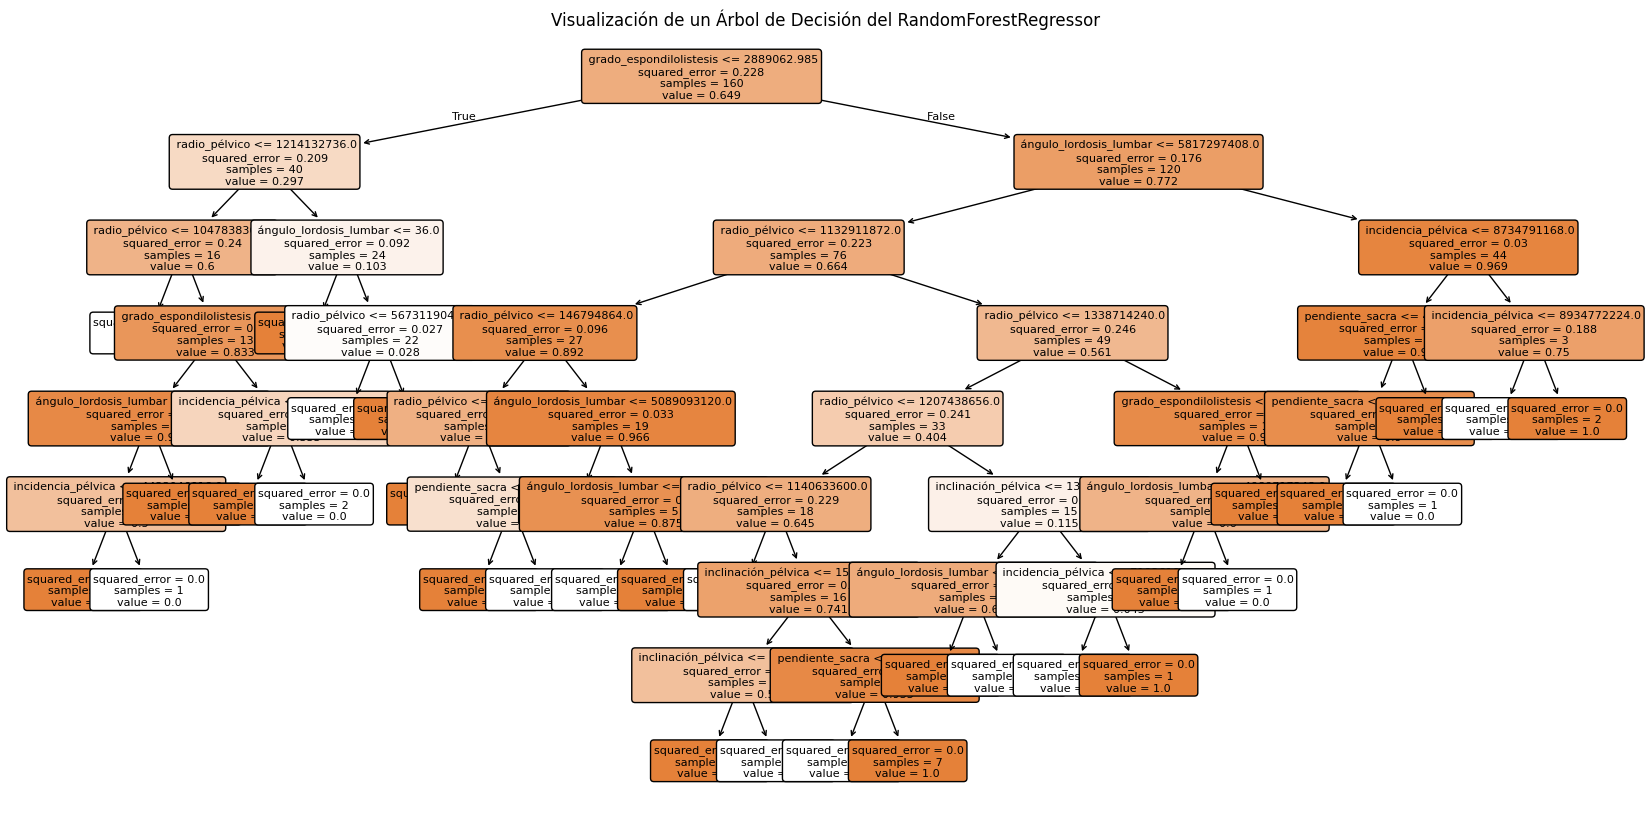

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Seleccionar un árbol del bosque para visualizar (ejemplo: el primer árbol)
# Asegúrate de que el modelo rf_reg_model ya ha sido entrenado
if 'rf_reg_model' in locals() and len(rf_reg_model.estimators_) > 0:
    tree_to_plot = rf_reg_model.estimators_[0] # Visualizar el primer árbol

    plt.figure(figsize=(20, 10)) # Ajusta el tamaño de la figura según sea necesario
    plot_tree(tree_to_plot,
              feature_names=X_reg.columns.tolist(), # Usar los nombres de las características
              filled=True,
              rounded=True,
              fontsize=8) # Ajusta el tamaño de fuente si es necesario
    plt.title("Visualización de un Árbol de Decisión del RandomForestRegressor")
    plt.show()
else:
    print("Error: El modelo 'rf_reg_model' no ha sido entrenado o no contiene estimadores.")

Importancia de las características (RandomForestRegressor):


,Característica,Importancia
5,grado_espondilolistesis,0.254768
0,incidencia_pélvica,0.196905
4,radio_pélvico,0.157381
1,inclinación_pélvica,0.142853
3,pendiente_sacra,0.129931
2,ángulo_lordosis_lumbar,0.118161


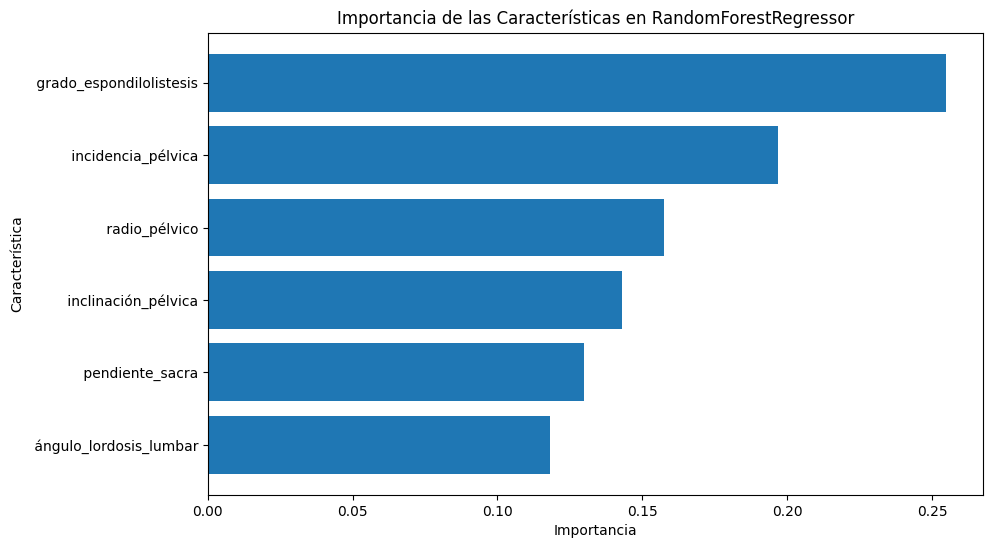

In [14]:
# Obtener la importancia de las características del modelo RandomForestRegressor
# Asegúrate de que el modelo rf_reg_model ya ha sido entrenado
if 'rf_reg_model' in locals():
    importances = rf_reg_model.feature_importances_

    # Crear un DataFrame para visualizar la importancia de las características
    feature_importances_df = pd.DataFrame({
        'Característica': X_reg.columns, # Usar los nombres de las características originales
        'Importancia': importances
    })

    # Ordenar por importancia de forma descendente
    feature_importances_df = feature_importances_df.sort_values(by='Importancia', ascending=False)

    print("Importancia de las características (RandomForestRegressor):")
    display(feature_importances_df)

    # Opcional: Visualizar la importancia de las características
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances_df['Característica'], feature_importances_df['Importancia'])
    plt.xlabel("Importancia")
    plt.ylabel("Característica")
    plt.title("Importancia de las Características en RandomForestRegressor")
    plt.gca().invert_yaxis() # Invertir el eje y para mostrar la más importante arriba
    plt.show()

else:
    print("Error: El modelo 'rf_reg_model' no ha sido entrenado.")

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Asegúrate de que las predicciones y los valores reales del conjunto de prueba estén disponibles
# (y_test_reg y y_pred_reg del código anterior)

# Calcular métricas de regresión adicionales
r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)) # RMSE es la raíz cuadrada del MSE

print("--- Métricas de Evaluación Adicionales para RandomForestRegressor ---")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print("--------------------------------------------------------------------")

--- Métricas de Evaluación Adicionales para RandomForestRegressor ---
Coeficiente de Determinación (R²): 0.2296
Error Absoluto Medio (MAE): 0.3081
Raíz del Error Cuadrático Medio (RMSE): 0.3984
--------------------------------------------------------------------
